In [ ]:
import numpy as np
import random
import os
from tslearn.svm import TimeSeriesSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tslearn.shapelets import LearningShapelets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


In [2]:
# Load prepared data
DATA_PATH = "/Users/efeemirhandogan/Downloads/datas/ready_data"
X_train = np.load(os.path.join(DATA_PATH, "X_train.npy"))
X_test = np.load(os.path.join(DATA_PATH, "X_test.npy"))
y_train = np.load(os.path.join(DATA_PATH, "y_train.npy"))
y_test = np.load(os.path.join(DATA_PATH, "y_test.npy"))
classes = np.load(os.path.join(DATA_PATH, "label_classes.npy"))
print("Data loaded successfully.")

Data loaded successfully.


MODEL 1: GAK + SVM
Training Shape: (479, 50, 75)
Test shape:   (120, 50, 75)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

[LibSVM]*.*
optimization finished, #iter = 238
obj = -79.493744, rho = -0.012500
nSV = 159, nBSV = 79
*
optimization finished, #iter = 80
obj = -80.000000, rho = -0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -80.000000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -80.000000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -80.000000, rho = 0.000000
nSV = 160, nBSV = 160
*.*
optimization finished, #iter = 238
obj = -79.493744, rho = 0.012500
nSV = 159, nBSV = 79
*.*
optimization finished, #iter = 238
obj = -79.493744, rho = 0.012500
nSV = 159, nBSV = 79
*.*
optimization finished, #iter = 238
obj = -79.493744, rho = 0.012500
nSV = 159, nBSV = 79
*.*
optimization finished, #iter = 238
obj = -79.493744, rho = 0.012500
nSV = 159, nBSV = 79
*
optimization finished, #iter = 80
obj = -80.000000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -80.000000, rho = 0.000000
n

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 11234 tasks  


 TEST ACCURACY: 33.33%

Classification Report:
              precision    recall  f1-score   support

      boxing       1.00      1.00      1.00        20
handclapping       0.00      0.00      0.00        20
  handwaving       0.00      0.00      0.00        20
     jogging       0.00      0.00      0.00        20
     running       0.00      0.00      0.00        20
     walking       0.20      1.00      0.33        20

    accuracy                           0.33       120
   macro avg       0.20      0.33      0.22       120
weighted avg       0.20      0.33      0.22       120



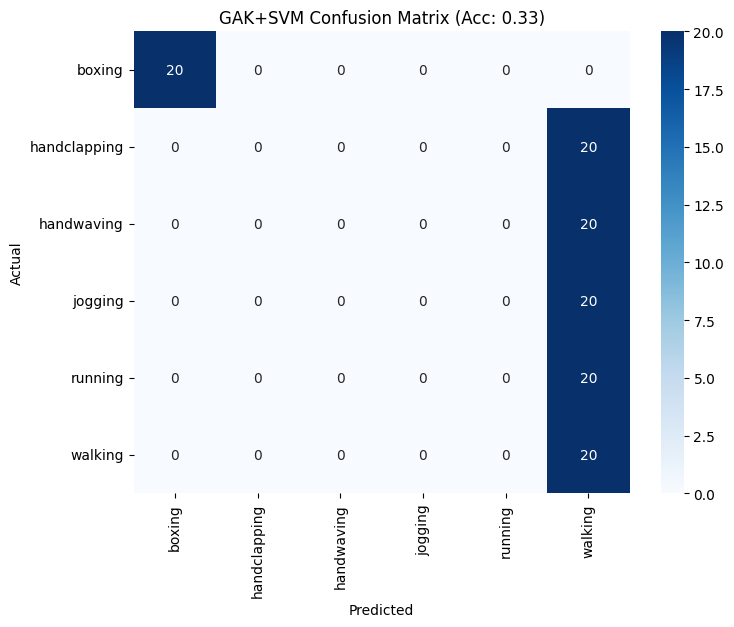

In [4]:
# GAK + SVM Model
def run_gak_svm(kernel, gamma, C):
    print("="*60)
    print("MODEL 1: GAK + SVM")
    print("="*60)

    # Train and Test shapes
    print(f"Training Shape: {X_train.shape}")
    print(f"Test shape:   {X_test.shape}")

    # Create SVM classifier with GAK kernel
    svm_clf = TimeSeriesSVC(kernel=kernel, gamma=gamma, C=C, verbose=True, n_jobs=-1)

    # Fit the model
    svm_clf.fit(X_train, y_train)

    # Test the model
    y_pred = svm_clf.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n TEST ACCURACY: {acc*100:.2f}%")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=classes, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"GAK+SVM Confusion Matrix (Acc: {acc:.2f})")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

if __name__ == "__main__":
    run_gak_svm(kernel="gak", gamma=0.1, C=1.0) # Initial paramters for testing

# Observations on GAK + SVM:
* Accuracy score is 33% which is quite low for a classification model.
* Model predicted boxing class with 100% accuracy but for predicted walking for all other classes.
* This indicates that the model is biased towards the walking class.
* Possible reasons for poor performance:
* Hyperparameter settings may not be optimal.
* Jogging, running and walking classes might have similer patterns, makes it difficult
 for the model to distinguish between them.

In [5]:
# Random Search for Gak + Svm
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'gamma': [0.1, 0.5, 1.0, 3.0],
    'C': [0.1, 1.0, 5.0, 10.0]
}

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=TimeSeriesSVC(kernel="gak", n_jobs=1, verbose=1),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Do

[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, n

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   32.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, n

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]:

[LibSVM]*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nB

[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_

[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.7s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[LibSVM]*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.8s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.8s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   33.4s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s


[LibSVM].*
optimization finished, #iter = 137
obj = -63.492187, rho = -0.015625
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 116
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 126
.*
optimization finished, #iter = 138
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 138
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 138
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 138
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 118
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[LibSVM].*
optimization finished, #iter = 138
obj = -63.492187, rho = -0.015625
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 120
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 126
.*
optimization finished, #iter = 139
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 139
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 139
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
.*
optimization finished, #iter = 139
obj = -63.492187, rho = 0.015625
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 118
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 

[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496037, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496035, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496037, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496037, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496037, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)

[LibSVM].*
optimization finished, #iter = 196
obj = -63.496036, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496036, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496036, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496036, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496036, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   38.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   37.8s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496052, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496052, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496052, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496052, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496052, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496051, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496049, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496051, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496051, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496051, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   38.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   38.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   39.0s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   38.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


[LibSVM]*
optimization finished, #iter = 64
obj = -63.999988, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999987, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999988, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999988, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999988, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999998, rho = 0.000000
nSV = 128, nBSV = 0
*
optimizat

[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.8s
[Parallel(n_jobs=

[LibSVM]*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimizat

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.3s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s


[LibSVM].*.*
optimization finished, #iter = 283
obj = -63.300925, rho = -0.010923
nSV = 127, nBSV = 0
*
optimization finished, #iter = 107
obj = -63.969602, rho = -0.000475
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999997, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999997, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999997, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 273
obj = -63.291504, rho = 0.010451
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 283
obj = -63.300928, rho = 0.010923
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 283
obj = -63.300928, rho = 0.010923
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 283
obj = -63.300928, rho = 0.010923
nSV = 127, nBSV = 0
*
optimization finished, #iter = 106
obj = -63.969605, rho = 0.000475
nSV = 128, nBSV = 0
*
optimization finished, #iter = 106
obj = -63.969605, rho = 0.000475
nSV = 12

[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   39.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s


[LibSVM].*.*
optimization finished, #iter = 266
obj = -63.404970, rho = -0.009297
nSV = 127, nBSV = 0
*
optimization finished, #iter = 81
obj = -63.979593, rho = -0.000319
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.406941, rho = 0.008982
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
*
optimization finished, #iter = 80
obj = -63.979594, rho = 0.000319
nSV = 128, nBSV = 0
*
optimization finished, #iter = 80
obj = -63.979594, rho = 0.000319
nSV = 128, 

[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.3s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*


[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.4s


[LibSVM].*.*
optimization finished, #iter = 264
obj = -63.405907, rho = -0.009283
nSV = 127, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.967660, rho = -0.000505
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999996, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999996, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999996, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.393301, rho = 0.008781
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 264
obj = -63.405911, rho = 0.009283
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 264
obj = -63.405911, rho = 0.009283
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 264
obj = -63.405911, rho = 0.009283
nSV = 127, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.967665, rho = 0.000505
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.967665, rho = 0.000505
nSV = 12

[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s


[LibSVM]*.*
optimization finished, #iter = 182
obj = -63.855071, rho = -0.002264
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966914, rho = -0.000517
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 166
obj = -63.847292, rho = 0.001748
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966919, rho = 0.000517
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966919, rho = 0.000517
nSV = 128, nB

[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.1s
[Parallel(n_

[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*


[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   37.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.6s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.3s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   38.8s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.4s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*


[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   39.8s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[LibSVM].*
optimization finished, #iter = 196
obj = -63.496059, rho = -0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
.*
optimization finished, #iter = 196
obj = -63.496059, rho = 0.007874
nSV = 127, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   40.9s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs

[LibSVM]*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = -0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -64.000000, rho = 0.000000
nSV = 128, nBSV = 0
*
optimizat

[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    5.4s
[Parallel(n_

[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   39.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   39.8s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   41.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   42.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   41.3s
[Parallel(n_jobs=1)]: Done 68449 tasks      | elapsed:   39.8s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   42.0s


[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   41.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.6s


[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   42.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[LibSVM]*
optimization finished, #iter = 126
obj = -11.974922, rho = -0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 126
obj = -11.974922, rho = 0.901562
nSV = 127, nBSV = 63
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


[LibSVM]*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = -0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, nBSV = 128
*
optimization finished, #iter = 64
obj = -12.160000, rho = 0.000000
nSV = 128, 

[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.2s


[LibSVM].*.*
optimization finished, #iter = 280
obj = -63.287241, rho = -0.011137
nSV = 127, nBSV = 0
*
optimization finished, #iter = 87
obj = -63.980106, rho = -0.000311
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 278
obj = -63.300356, rho = 0.010831
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 280
obj = -63.287243, rho = 0.011137
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 280
obj = -63.287243, rho = 0.011137
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 280
obj = -63.287243, rho = 0.011137
nSV = 127, nBSV = 0
*
optimization finished, #iter = 86
obj = -63.980107, rho = 0.000311
nSV = 128, nBSV = 0
*
optimization finished, #iter = 86
obj = -63.980107, rho = 0.000311
nSV = 128, 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   42.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_

[LibSVM].*.*
optimization finished, #iter = 266
obj = -63.404970, rho = -0.009297
nSV = 127, nBSV = 0
*
optimization finished, #iter = 81
obj = -63.979593, rho = -0.000319
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999999, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.406941, rho = 0.008982
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.404971, rho = 0.009297
nSV = 127, nBSV = 0
*
optimization finished, #iter = 80
obj = -63.979594, rho = 0.000319
nSV = 128, nBSV = 0
*
optimization finished, #iter = 80
obj = -63.979594, rho = 0.000319
nSV = 128, 

[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_

[LibSVM].*.*
optimization finished, #iter = 264
obj = -63.405907, rho = -0.009283
nSV = 127, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.967660, rho = -0.000505
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999996, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999996, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999996, rho = 0.000000
nSV = 128, nBSV = 0
.*.*
optimization finished, #iter = 266
obj = -63.393301, rho = 0.008781
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 264
obj = -63.405911, rho = 0.009283
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 264
obj = -63.405911, rho = 0.009283
nSV = 127, nBSV = 0
.*.*
optimization finished, #iter = 264
obj = -63.405911, rho = 0.009283
nSV = 127, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.967665, rho = 0.000505
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.967665, rho = 0.000505
nSV = 12

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 72199 tasks      | elapsed:   20.8s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


[LibSVM]*.*
optimization finished, #iter = 182
obj = -63.855071, rho = -0.002264
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966914, rho = -0.000517
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*
optimization finished, #iter = 64
obj = -63.999995, rho = 0.000000
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 166
obj = -63.847292, rho = 0.001748
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*.*
optimization finished, #iter = 182
obj = -63.855075, rho = 0.002265
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966919, rho = 0.000517
nSV = 128, nBSV = 0
*
optimization finished, #iter = 113
obj = -63.966919, rho = 0.000517
nSV = 128, nB

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 11249 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:    2.0s
[Parallel

[LibSVM]*
optimization finished, #iter = 158
obj = -15.014932, rho = -0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 80
obj = -15.200000, rho = -0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 158
obj = -15.014932, rho = 0.901250
nSV = 159, nBSV = 79
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, nBSV = 160
*
optimization finished, #iter = 80
obj = -15.200000, rho = 0.000000
nSV = 160, 

MODEL 1: GAK + SVM
Training Shape: (479, 50, 75)
Test shape:   (120, 50, 75)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 11246 tasks  

[LibSVM]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 11246 tasks  


 TEST ACCURACY: 56.67%

Classification Report:
              precision    recall  f1-score   support

      boxing       0.33      1.00      0.50        20
handclapping       0.00      0.00      0.00        20
  handwaving       0.00      0.00      0.00        20
     jogging       0.68      0.85      0.76        20
     running       0.93      0.70      0.80        20
     walking       0.85      0.85      0.85        20

    accuracy                           0.57       120
   macro avg       0.47      0.57      0.48       120
weighted avg       0.47      0.57      0.48       120



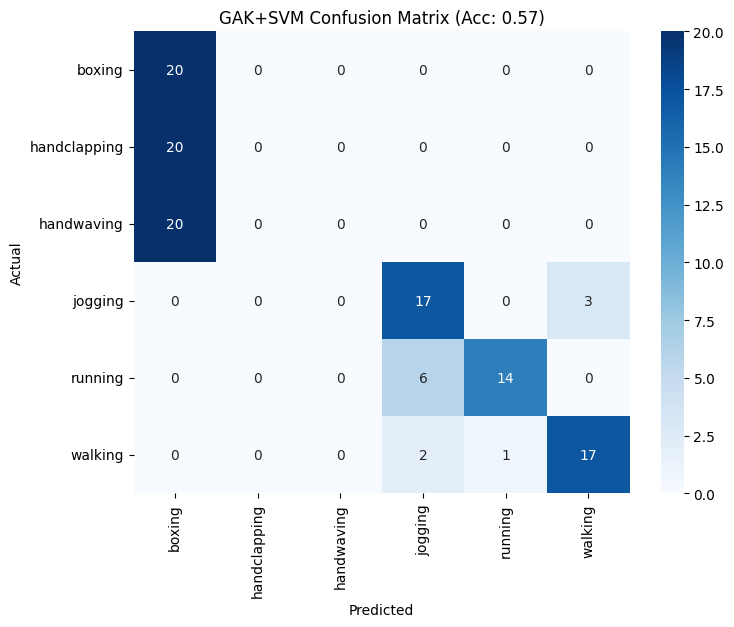

In [ ]:
# Run final model with best hyperparameters
if __name__ == "__main__":
    run_gak_svm(kernel="gak", gamma=0.5, C=0.1)

# Obervations on GAK + SVM After Hyperparameter Tuning:
* The accuracy score of model significantly improved after hyperparameter tuning (33% -> 57%).
* Now the model can distinguish between jogging, running and walking classes much better.
* But now the model is struggling to classify upper body activites and predict them all as boxing.
* The reason could be the similarity of upper body activities in terms of sensor data.

In [ ]:
# Shapelets + MLP Model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initial Hyperparameters
BATCH_SIZE = 16
EPOCHS = 50
LEARNING_RATE = 0.001

print(f"Running on: {DEVICE}")

def run_shapelets_mlp():
    print("="*60)
    print("MODEL 2: SHAPELETS + MLP")
    print("="*60)

    # Preparing Data
    shapelet_model = LearningShapelets(n_shapelets_per_size={20: 10},
                                       max_iter=50,
                                       verbose=1,
                                       scale=False,
                                       random_state=42)

    # Fit the model
    shapelet_model.fit(X_train, y_train)

    # Transform to shapelet space
    X_train_trans = shapelet_model.transform(X_train)
    X_test_trans = shapelet_model.transform(X_test)

    print(f"Transformation Successful!")
    print(f"New X_train shape: {X_train_trans.shape}")

    # Prepare DataLoader for PyTorch
    train_data = TensorDataset(torch.tensor(X_train_trans, dtype=torch.float32),
                               torch.tensor(y_train, dtype=torch.long))
    test_data = TensorDataset(torch.tensor(X_test_trans, dtype=torch.float32),
                              torch.tensor(y_test, dtype=torch.long))

    train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

    # MLP Model Definition with PyTorch
    class SimpleMLP(nn.Module):
        def __init__(self, input_dim, num_classes):
            super(SimpleMLP, self).__init__()
            self.net = nn.Sequential(
                nn.Linear(input_dim, 64),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, num_classes)
            )

        def forward(self, x):
            return self.net(x)


    input_dim = X_train_trans.shape[1]
    num_classes = len(classes)

    # Initialize Model, Loss Function and Optimizer
    model = SimpleMLP(input_dim, num_classes).to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # Model Training
    print(f"\n MLP Training ({EPOCHS} Epoch)...")
    train_losses = []

    model.train()
    for epoch in range(EPOCHS):
        epoch_loss = 0
        correct = 0
        total = 0

        # Batch Training
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            # zero grad for each batch
            optimizer.zero_grad()
            outputs = model(inputs)

            # loss calculation
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() # Accumulate loss
            _, predicted = torch.max(outputs.data, 1) # Get predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item() # Count of correct predictions

        # Epoch statistics
        avg_loss = epoch_loss / len(train_loader)
        acc = 100 * correct / total
        train_losses.append(avg_loss)

        if (epoch+1) % 10 == 0:
            print(f"   Epoch [{epoch+1}/{EPOCHS}] - Loss: {avg_loss:.4f} - Acc: {acc:.2f}%")


    # Model Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_acc = accuracy_score(all_labels, all_preds)
    print(f"\nTEST ACCURACY: {test_acc*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes))

    # Visualization
    plt.figure(figsize=(12, 5))

    # Loss Graph
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.title("Loss Graph")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Confusion Matrix
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
    plt.title(f"MLP Confusion Matrix (Acc: {test_acc:.2f})")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_shapelets_mlp()


Running on: cpu
MODEL 2: SHAPELETS + MLP


/Users/efeemirhandogan/.pyenv/versions/3.13.0/lib/python3.13/site-packages/tslearn/shapelets/shapelets.py:492: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


# Obervations on Shapelets + MLP:
* The accuracy score (55%) shows that it performs average on the test set.
* The loss graph indicates that model is learning but it might need more epochs or hyperparameter tuning.
* According to the confusion matrix the model still strugling to differentiate between
 jogging and walking classes.
* Also the model still can't distguish between upper body and lower body activites effectively.
* We'll discuss performance improvement after hyperparameter tuning in the next steps.
* Shapelet size, number of shapelets, batch size, learning rate and epochs will be included in tuning

In [ ]:
# Hyperparameter Tuning for Shapelets + MLP can be added similarly using libraries like Optuna or manual grid search.
from sklearn.model_selection import train_test_split
import warnings
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)
warnings.filterwarnings("ignore", message=".*does not support masking.*")
warnings.filterwarnings("ignore", message="The default value for 'scale' is set to False ")
class SimpleMLP(nn.Module):
        def __init__(self, input_dim, num_classes):
            super(SimpleMLP, self).__init__()
            self.net = nn.Sequential(
                nn.Linear(input_dim, 64),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, num_classes)
            )

        def forward(self, x):
            return self.net(x)

param_space = {
    "shapelet_size": [15, 20, 30],
    "n_shapelets": [5, 10],
    "batch_size": [16, 32],
    "learning_rate": [1e-3, 5e-4],
    "epochs": [30, 50]
}

def train_eval_one_config(shapelet_size, n_shapelets, batch_size, lr, epochs):
    # Shapelets
    shapelet_model = LearningShapelets(
        n_shapelets_per_size={shapelet_size: n_shapelets},
        max_iter=50,
        scale=False,
        random_state=42,
        verbose=0
    )

    shapelet_model.fit(X_tr, y_tr)

    X_tr_s = shapelet_model.transform(X_tr)
    X_val_s = shapelet_model.transform(X_val)

    # DataLoader
    train_ds = TensorDataset(
        torch.tensor(X_tr_s, dtype=torch.float32),
        torch.tensor(y_tr, dtype=torch.long)
    )
    val_ds = TensorDataset(
        torch.tensor(X_val_s, dtype=torch.float32),
        torch.tensor(y_val, dtype=torch.long)
    )

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    # Model
    model = SimpleMLP(X_tr_s.shape[1], len(classes)).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # Training
    for _ in range(epochs):
        model.train()
        for x, y in train_loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            optimizer.zero_grad()
            loss = criterion(model(x), y)
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            preds = torch.argmax(model(x), dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

    val_acc = correct / total
    return val_acc


best_acc = 0
best_params = None
results = []

import random
random.seed(42)

seen = set()
results = []
best_acc = 0
best_params = None

for i in range(30):
    params = {k: random.choice(v) for k, v in param_space.items()}

    params_key = (
        params["shapelet_size"],
        params["n_shapelets"],
        params["batch_size"],
        params["learning_rate"],
        params["epochs"]
    )

    if params_key in seen:
        continue

    seen.add(params_key)

    print(f"Trying: {params}")

    val_acc = train_eval_one_config(
        params["shapelet_size"],
        params["n_shapelets"],
        params["batch_size"],
        params["learning_rate"],
        params["epochs"]
    )

    results.append((val_acc, params))

    if val_acc > best_acc:
        best_acc = val_acc
        best_params = params

    print(f"Current best accuracy: {best_acc:.4f}")


print("\nBEST CONFIG:")
for k, v in best_params.items():
    print(f"{k}: {v}")


# According to result first Shapelet + MLP model was best.
* Validation accuracy found as 61% in hyperparameter tuning.
* We also achieved 55% accuracy on test set
* So possible reasons of average performance of Shapelet + MLP model might be:
* Shapelet parameters might not be optimal yet.
* MLP architecture might be too simple for the complexity of the data.
* That's why we will try different architectures like CNN, LSTM, and hybrid models in the next steps to improve performance.


In [ ]:
# LSTM Model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initial Hyperparameters
INPUT_SIZE = 75
HIDDEN_SIZE = 128
NUM_LAYERS = 2
NUM_CLASSES = 6
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001

print(f"Running on: {DEVICE}")

def run_lstm_model():
    print("="*60)
    print("MODEL 3: LSTM")
    print("="*60)

    # Prepare DataLoader for PyTorch
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                  torch.tensor(y_train, dtype=torch.long))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                 torch.tensor(y_test, dtype=torch.long))

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print(f"Input Shape: {X_train.shape}")

    # LSTM Model Definition
    class LSTMClassifier(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, num_classes):
            super(LSTMClassifier, self).__init__()
            self.hidden_size = hidden_size
            self.num_layers = num_layers

            # LSTM Layer
            if num_layers == 1:
                self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                                    batch_first=True)
            else:
                self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                                batch_first=True, dropout=0.2)

            # Fully Connected Layer
            self.fc = nn.Linear(hidden_size, num_classes)

        def forward(self, x):

            # Initial hidden state ve cell state
            h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE)
            c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE)

            # LSTM Forward
            out, _ = self.lstm(x, (h0, c0))

            # Output from the last time step to fully connected layer
            out = out[:, -1, :]

            # Final output
            out = self.fc(out)
            return out

    model = LSTMClassifier(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, NUM_CLASSES).to(DEVICE)

    # Loss and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # Training
    print(f"\nLSTM Training ({EPOCHS} Epoch)...")
    train_losses = []

    model.train()
    for epoch in range(EPOCHS):
        epoch_loss = 0
        correct = 0
        total = 0

        # Batch Training
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            # zero grad for each batch
            optimizer.zero_grad()
            outputs = model(inputs)
            # Calculate loss
            loss = criterion(outputs, labels)

            loss.backward()
            # Gradient Clipping to avoid exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            epoch_loss += loss.item() # Accumulate loss
            _, predicted = torch.max(outputs.data, 1) # Get predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item() # Count of correct predictions

        # Epoch statistics
        avg_loss = epoch_loss / len(train_loader)
        acc = 100 * correct / total
        train_losses.append(avg_loss)

        if (epoch+1) % 5 == 0:
            print(f"   Epoch [{epoch+1}/{EPOCHS}] - Loss: {avg_loss:.4f} - Train Acc: {acc:.2f}%")

    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_acc = accuracy_score(all_labels, all_preds)
    print(f"\n TEST ACCURACY: {test_acc*100:.2f}%")
    print("\n Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes, zero_division=0))

    # Visualization
    plt.figure(figsize=(12, 5))

    # Loss Graph
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.title("Loss Graph")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Confusion Matrix
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
    plt.title(f"LSTM Confusion Matrix (Acc: {test_acc:.2f})")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    run_lstm_model()

# Observations on LSTM Model:
* The LSTM model achieved best and respectable accuracy compared to previous models with 75%.
* It predicted boxing class with 100% accuracy but struggled with handclapping and handwaiving.
* But we can say that struggle is understandable due to similarity of these two classes.
* The model also has potential for further improvement by tuning hyperparameters.
* For the hyperparameter tuning we will test hidden size, number of layers, learning rate, batch size and epochs with manuel grid/random search.



In [ ]:
# LSTM Hyperparameter Tuning Same Structure as before only with Variable Hyperparameters
def test_lstm_model():
    print("="*60)
    print("LSTM HYPERPARAMETER TUNING")
    print("="*60)

    # Model Definiton With Variable Hyperparameters
    class LSTMClassifier(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, num_classes):
            super(LSTMClassifier, self).__init__()
            if num_layers == 1:
                self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                                    batch_first=True)
            else:
                self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                                    batch_first=True, dropout=0.2)
            self.fc = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(DEVICE)
            c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(DEVICE)
            out, _ = self.lstm(x, (h0, c0))
            out = out[:, -1, :]
            out = self.fc(out)
            return out

    # Train and Evaluate Function
    def train_evaluate_single_config(params):
        # Extract Parameters
        h_size = params['hidden_size']
        n_layers = params['num_layers']
        lr = params.get('learning_rate', LEARNING_RATE) # Default to initial LR if not provided
        batch_s = params['batch_size']
        eps = params['epochs']

        print(f"\nTesting on: Hidden={h_size}, Layers={n_layers}, LR={lr}, Batch={batch_s}, Epochs={eps}")

        # Prepare DataLoader
        train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                      torch.tensor(y_train, dtype=torch.long))
        test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                     torch.tensor(y_test, dtype=torch.long))

        train_loader = DataLoader(train_dataset, batch_size=batch_s, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_s, shuffle=False)

        # Model, Loss, Optimizer
        model = LSTMClassifier(INPUT_SIZE, h_size, n_layers, NUM_CLASSES).to(DEVICE)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Train loop
        model.train()
        for epoch in range(eps):
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                # Gradient Clipping to avoid exploding gradients
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()

        # Evaluation
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs = inputs.to(DEVICE)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        print(f" --> Accuracy: {acc*100:.2f}%")
        return acc, params

    #  Manuel Random Search for Hyperparameter Tuning
    param_grid = {
        'hidden_size': [64, 128, 256],
        'num_layers': [1, 2, 3],
        'learning_rate': [0.001, 0.0005],
        'batch_size': [32,64,128],
        'epochs': [50,75,100]
    }

    best_acc = 0.0
    best_params = {}
    n_iter = 10

    for i in range(n_iter):
        # Random selection of parameters
        current_params = {
            'hidden_size': random.choice(param_grid['hidden_size']),
            'num_layers': random.choice(param_grid['num_layers']),
            'learning_rate': random.choice(param_grid['learning_rate']),
            'batch_size': random.choice(param_grid['batch_size']),
            'epochs': random.choice(param_grid['epochs'])

        }

        acc, params = train_evaluate_single_config(current_params)

        if acc > best_acc:
            best_acc = acc
            best_params = params

        print(f"Current best accuracy: {best_acc:.4f}")

    print("\nBEST CONFIG:")
    for k, v in best_params.items():
        print(f"{k}: {v}")

if __name__ == "__main__":
    test_lstm_model()

# According to results of hyperparameter tuning best parameters are:
* hiden size = 128 (previous : 128)
* number of layers = 1 (previous : 2)
* learning rate = 0.001 (previous : 0.001)
* batch size = 128 (previous : 32)
* epochs = 75 (previous : 50)

- Now we'll run LSTM model with these best parameters.


In [ ]:
# Final LSTM Run with Best Hyperparameters
BATCH_SIZE = 128
HIDDEN_SIZE = 256
EPOCHS = 75
NUM_LAYERS = 1
LEARNING_RATE = 0.001
if __name__ == "__main__":
    run_lstm_model()

# Observations on LSTM model after hyperparameter tuning:,
* Increasing epochs, batch size and decreasing number of layers improved performance (75% -> 83%).
* Now the model can distinguish between handclapping and handwaiving activities better.
* The reason of this imporvemnt might be the larger batch size providing more stable gradient estimates and
 reduced overfitting with fewer layers.

In [ ]:
# Testing with different parameters
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 0.0005
if __name__ == "__main__":
    run_lstm_model()

TensorFlow version: 2.19.0
MODEL 4: CNN1D + LSTM
Epoch 1/70
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0625 - loss: 2.1104

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.2458 - loss: 1.9581 - val_accuracy: 0.1667 - val_loss: 2.0166 - learning_rate: 0.0010
Epoch 2/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4931 - loss: 1.5833 - val_accuracy: 0.1667 - val_loss: 2.2214 - learning_rate: 0.0010
Epoch 3/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5231 - loss: 1.4047 - val_accuracy: 0.2250 - val_loss: 2.2309 - learning_rate: 0.0010
Epoch 4/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5641 - loss: 1.2016 - val_accuracy: 0.2750 - val_loss: 2.3773 - learning_rate: 0.0010
Epoch 5/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6002 - loss: 1.0656 - val_accuracy: 0.3583 - val_loss: 2.5559 - learning_rate: 0.0010
Epoch 6/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6840 - loss: 0.9250 - val_accuracy: 0.5417 - val_loss: 1.1985 - learning_rate: 0.0010
Epoch 7/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7371 - loss: 0.8642 - val_accuracy: 0.58

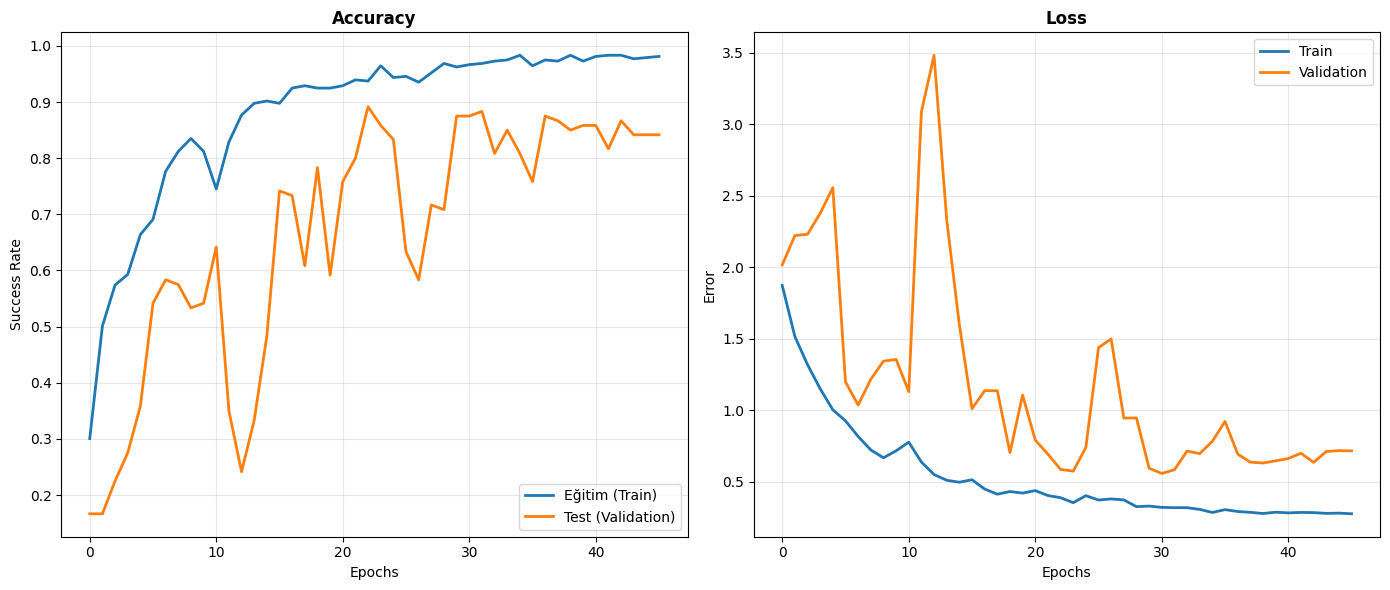

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Model 4 Classification Report:
              precision    recall  f1-score   support

      boxing       1.00      1.00      1.00        20
handclapping       1.00      0.90      0.95        20
  handwaving       0.91      1.00      0.95        20
     jogging       0.65      0.75      0.70        20
     running       0.88      0.75      0.81        20
     walking       0.85      0.85      0.85        20

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



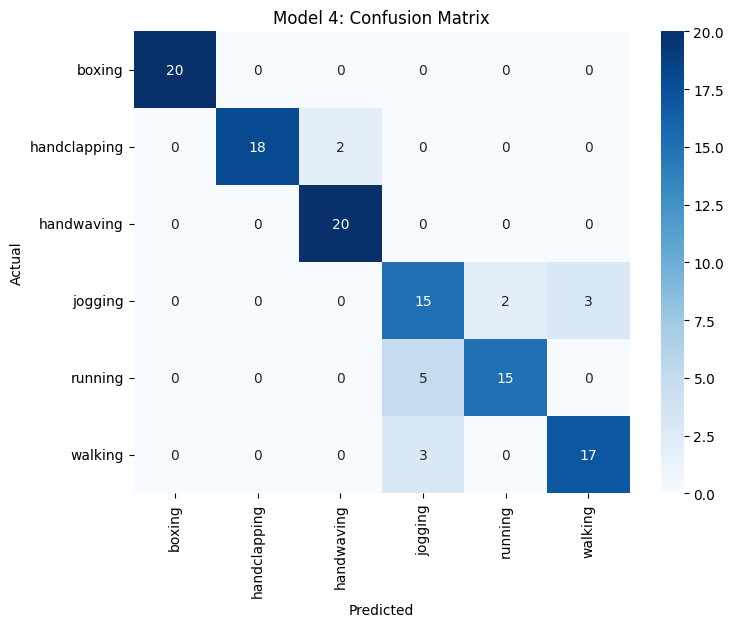

In [24]:
# 1D CNN + LSTM Model
SEED = 42 # Fixed seed for reproducibility
EPOCHS = 70
DROPOUT_RATE = 0.3
LEARNING_RATE = 0.001
BATCH_SIZE = 32

# Set seeds for reproducibility
def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)



def run_cnn_lstm_model(epochs, dropout_rate, batch_size, learning_rate):

    print("TensorFlow version:", tf.__version__)
    tf.keras.backend.clear_session()

    # Fix the seed
    set_seeds(SEED)

    print("="*60)
    print("MODEL 4: CNN1D + LSTM")
    print("="*60)

    # inputs and outputs
    n_timesteps = X_train.shape[1]
    n_features = X_train.shape[2]
    n_outputs = len(classes)


    # Model Structure
    dropout_rate = dropout_rate

    model = Sequential()


    # CNN Part - uses relu activation and L2 regularization with padding
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same',

                     kernel_regularizer=l2(0.001), input_shape=(n_timesteps, n_features)))

    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))



    # LSTM Part
    model.add(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.001)))
    model.add(Dropout(dropout_rate))



    # Fully Connected (Dense Layer)
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_outputs, activation='softmax'))



    # Optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



    # Early stoppage if validation is not increasing
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

    # Learning rate reduction on plateau
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)


    # Fit the model
    history = model.fit(
        X_train, y_train,

        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stop, lr_scheduler],
        verbose=1
    )



    # Results
    val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)


    print(f"Training Accuracy: %{train_acc*100:.2f}")
    print(f"Test Accuracy: %{val_acc*100:.2f}")

    # Plotting Training History
    plt.figure(figsize=(14, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Eğitim (Train)', color='#1f77b4', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Test (Validation)', color='#ff7f0e', linewidth=2)
    plt.title('Accuracy', fontsize=12, fontweight='bold')
    plt.xlabel('Epochs')
    plt.ylabel('Success Rate')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)


    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train', color='#1f77b4', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation', color='#ff7f0e', linewidth=2)
    plt.title('Loss', fontsize=12, fontweight='bold')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()

    plt.show()


    # Report
    y_pred = np.argmax(model.predict(X_test), axis=1)
    print("\nModel 4 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=classes))


    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title("Model 4: Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()



if __name__ == "__main__":

    run_cnn_lstm_model(epochs=EPOCHS, dropout_rate=DROPOUT_RATE, batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE)

# Obervations on CNN + LSTM Model:
* According to high accuracy score (88%) and well-distributed confusion matrix, we can say that
 this model is best among the four models.
* The combination of CNN and LSTM layers effectively captures both upper body and lower body activites.
* When we look at the confusion matrix , we can see that it predicted boxing, handclapping and handwaiving classes
 perfectly.
* But it is still struggling while predicting jogging, running and walking classes.
* This is likely due to similarity of these classes have some similar patterns in the time series data.
* The dropout layers and regularization help in preventing overfitting, leading to better generalization on the test set.
* But there might be still room for improvement, so we can try different hyperparameters.
* Overall, this CNN + LSTM model performed strong performance.

In [25]:
# Hyperparameter Tuning for CNN1D + LSTM
params_grid ={
    'dropout_rate': [0.2,0.3,0.4],
    'learning_rate': [0.001,0.0005],
    'batch_size': [32,64],
    'epochs': [50,75]
}
def test_cnn_lstm_model(epochs, dropout_rate, batch_size, learning_rate):
    print("TensorFlow version:", tf.__version__)
    tf.keras.backend.clear_session()

    # Fix the seed
    set_seeds(SEED)

    print("="*60)
    print("MODEL 4: CNN1D + LSTM HYPERPARAMETER TUNING")
    print("="*60)

    # inputs and outputs
    n_timesteps = X_train.shape[1]
    n_features = X_train.shape[2]
    n_outputs = len(classes)


    # Model Structure
    dropout_rate = dropout_rate

    model = Sequential()


    # CNN Part - uses relu activation and L2 regularization with padding
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same',

                     kernel_regularizer=l2(0.001), input_shape=(n_timesteps, n_features)))

    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))



    # LSTM Part
    model.add(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.001)))
    model.add(Dropout(dropout_rate))



    # Fully Connected (Dense Layer)
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_outputs, activation='softmax'))



    # Optimizer
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



    # Early stoppage if validation is not increasing
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

    # Learning rate reduction on plateau
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)


    # Fit the model
    history = model.fit(
        X_train, y_train,

        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[early_stop, lr_scheduler],
        verbose=1
    )


    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy


# Random choice of parameters
seen = set()
best_acc = 0
best_params = None
for i in range(10):
    params = {k: random.choice(v) for k, v in params_grid.items()}
    if tuple(params.items()) in seen:
        continue
    seen.add(tuple(params.items()))

    print(f"Trying: {params}")

    acc = test_cnn_lstm_model(
        epochs=params['epochs'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        learning_rate=params['learning_rate']
    )
    if acc > best_acc:
        best_acc = acc
        best_params = params

    print(f"Current best accuracy: {best_acc:.4f}")
print("\nBEST CONFIG:")
for k, v in best_params.items():
    print(f"{k}: {v}")
# Final CNN1D + LSTM Run with Best Hyperparameters


Trying: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 50}
TensorFlow version: 2.19.0
MODEL 4: CNN1D + LSTM HYPERPARAMETER TUNING
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.2110 - loss: 1.9721 - val_accuracy: 0.2250 - val_loss: 2.0012 - learning_rate: 0.0010
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4643 - loss: 1.6418 - val_accuracy: 0.1667 - val_loss: 2.0238 - learning_rate: 0.0010
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5852 - loss: 1.3986 - val_accuracy: 0.1667 - val_loss: 2.1437 - learning_rate: 0.0010
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5351 - loss: 1.2435 - val_accuracy: 0.1833 - val_loss: 2.3502 - learning_rate: 0.0010
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6176 - loss: 1.0936 - val_accuracy: 0.2167 - val_loss: 2.3050 - learning_rate: 0.0010
Epoch 6/50
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6588 - loss: 0.9892
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6581 - loss: 0.9878 - val_accuracy: 0.2750 - val_loss: 

# According to results of hyperparameter tuning best parameters are:
* dropout rate = 0.4 (previous : 0.3)
* learning rate = 0.001 (previous : 0.001)
* batch size = 32 (previous : 32)
* epochs = 75 (previous : 70)

- Now we'll run CNN + LSTM model with these best parameters.

TensorFlow version: 2.19.0
MODEL 4: CNN1D + LSTM
Epoch 1/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.2236 - loss: 1.9870 - val_accuracy: 0.1667 - val_loss: 2.0073 - learning_rate: 0.0010
Epoch 2/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.4648 - loss: 1.6685 - val_accuracy: 0.1667 - val_loss: 2.1583 - learning_rate: 0.0010
Epoch 3/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.4909 - loss: 1.5056 - val_accuracy: 0.1833 - val_loss: 2.3140 - learning_rate: 0.0010
Epoch 4/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5717 - loss: 1.2935 - val_accuracy: 0.3000 - val_loss: 2.1233 - learning_rate: 0.0010
Epoch 5/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5901 - loss: 1.2139 - val_accuracy: 0.3000 - val_loss: 2.3793 - learning_rate: 0.0010
Epoch 6/75
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6204 - loss: 1.1308
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51

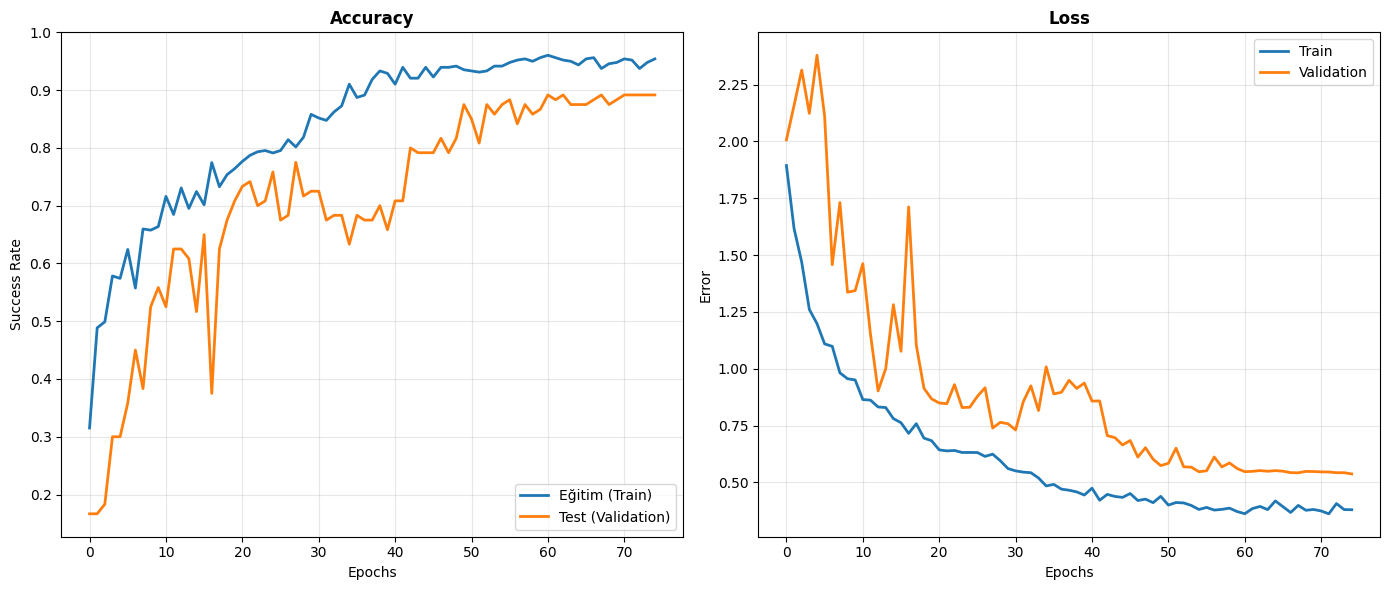

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Model 4 Classification Report:
              precision    recall  f1-score   support

      boxing       1.00      1.00      1.00        20
handclapping       0.95      0.95      0.95        20
  handwaving       0.95      0.95      0.95        20
     jogging       0.70      0.80      0.74        20
     running       0.94      0.85      0.89        20
     walking       0.84      0.80      0.82        20

    accuracy                           0.89       120
   macro avg       0.90      0.89      0.89       120
weighted avg       0.90      0.89      0.89       120



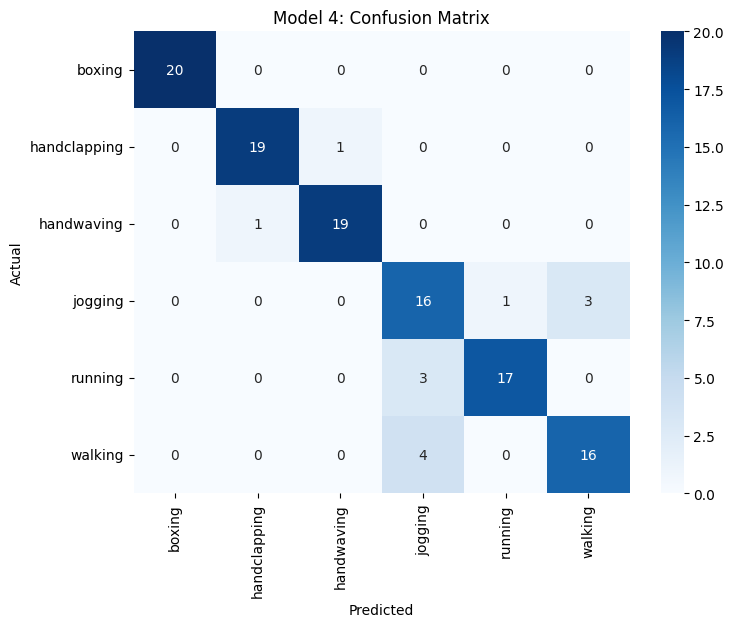

In [26]:
# Run CNN + LSTM model with best parameters found on hyperparameter tuning
EPOCHS = 75
DROPOUT_RATE = 0.4
LEARNING_RATE = 0.001
BATCH_SIZE = 32
if __name__ == "__main__":
  run_cnn_lstm_model(epochs=EPOCHS, dropout_rate=DROPOUT_RATE,
                     batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE)

# Observations after Hypoerparameter Tuning for CNN + LSTM:
* Increasing dropout rate to 0.4 improved generalization.
* A learning rate of 0.001 provided stable convergence.
* A batch size of 32 balanced training speed and model performance.
* Imcreasing epochs to 75 allowed the model to learn slightly better without overfitting.
* These adjustments provided a slight boost in test accuracy and more stable training dynamics.